In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import VarianceThreshold, RFE

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLdataset2/cancerdata.csv')

In [ ]:
silinecek_sutun = "Unnamed: 32"
df = df.drop(silinecek_sutun, axis=1)

In [ ]:
silinecek_sutun = "id"
df = df.drop(silinecek_sutun, axis=1)

In [ ]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Ortalama Metrikler:
Average Accuracy: 0.9678571428571429
Average F1 Score: 0.9577997488368106
Average Precision: 0.9596273291925467
Average Recall: 0.9582470976050436


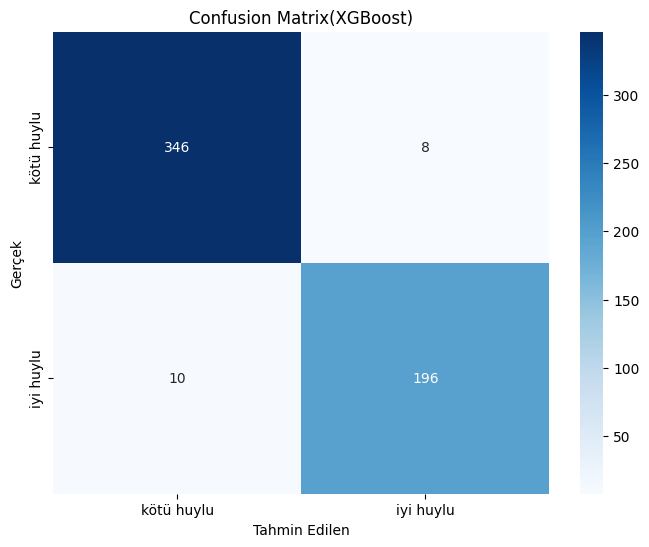

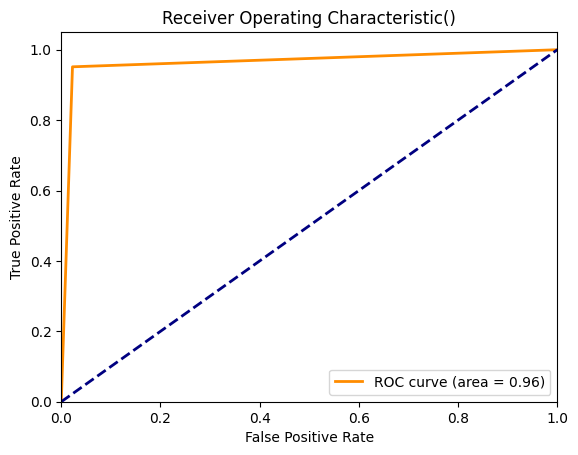

In [ ]:
train_data = df.drop(columns=["diagnosis"])
X = train_data
y = df["diagnosis"]

def k_fold_cross_validation(X, y, k=10):
    fold_size = len(X) // k
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    all_true_labels = []
    all_predictions = []

    def calculate_metrics(y_true, y_pred):
        truepositive = np.sum((y_true == 1) & (y_pred == 1))
        truenegative = np.sum((y_true == 0) & (y_pred == 0))
        falsepositive = np.sum((y_true == 0) & (y_pred == 1))
        falsenegative = np.sum((y_true == 1) & (y_pred == 0))

        accuracy = (truepositive + truenegative) / (truepositive + truenegative + falsepositive + falsenegative)

        if (truepositive + falsepositive) == 0:
            precision = 0
        else:
            precision = truepositive / (truepositive + falsepositive)

        if (truepositive + falsenegative) == 0:
            recall = 0
        else:
            recall = truepositive / (truepositive + falsenegative)

        if (precision + recall) == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)

        return accuracy, precision, recall, f1

    for i in range(k):
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(X))) - set(test_indices))
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        accuracy, precision, recall, f1 = calculate_metrics(y_test.values, predictions)

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

        all_true_labels.extend(y_test)
        all_predictions.extend(predictions)

    print("Ortalama Metrikler:")
    print(f"Average Accuracy: {np.mean(accuracy_scores)}")
    print(f"Average F1 Score: {np.mean(f1_scores)}")
    print(f"Average Precision: {np.mean(precision_scores)}")
    print(f"Average Recall: {np.mean(recall_scores)}")

    # Confusion matrix oluşturma
    cm = confusion_matrix(all_true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['kötü huylu', 'iyi huylu'], yticklabels=['kötü huylu', 'iyi huylu'])
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix(XGBoost)')
    plt.show()

    # ROC eğrisi oluşturma
    fpr, tpr, thresholds = roc_curve(all_true_labels, all_predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic()')
    plt.legend(loc="lower right")
    plt.show()

k_fold_cross_validation(X, y)

Ortalama Metrikler:
Average Accuracy: 0.9357142857142856
Average F1 Score: 0.9073072529945524
Average Precision: 0.9335168997668998
Average Recall: 0.8892775951767706


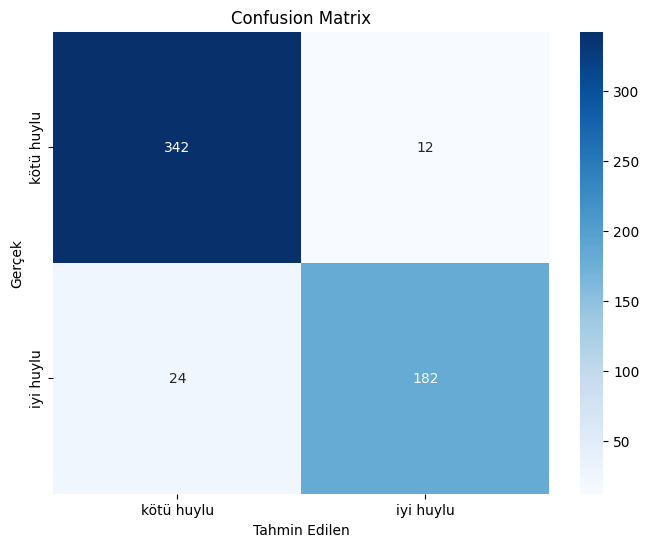

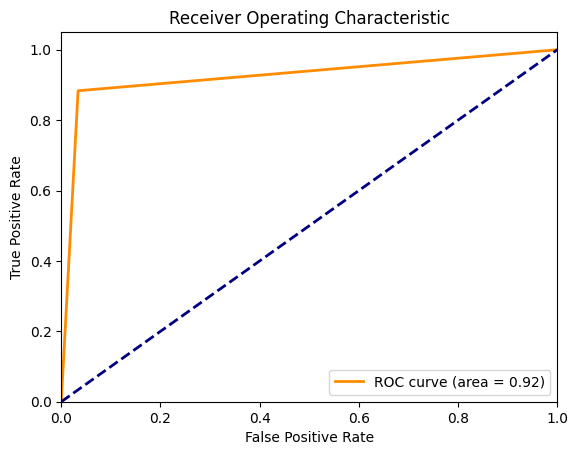

In [27]:
#feature selection olmadan naive bayes
train_data = df.drop(columns=["diagnosis"])
X = train_data
y = df["diagnosis"]

def k_fold_cross_validation(X, y, k=10):
    fold_size = len(X) // k
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    all_true_labels = []
    all_predictions = []

    def calculate_metrics(y_true, y_pred):
        truepositive = np.sum((y_true == 1) & (y_pred == 1))
        truenegative = np.sum((y_true == 0) & (y_pred == 0))
        falsepositive = np.sum((y_true == 0) & (y_pred == 1))
        falsenegative = np.sum((y_true == 1) & (y_pred == 0))

        accuracy = (truepositive + truenegative) / (truepositive + truenegative + falsepositive + falsenegative)

        if (truepositive + falsepositive) == 0:
            precision = 0
        else:
            precision = truepositive / (truepositive + falsepositive)

        if (truepositive + falsenegative) == 0:
            recall = 0
        else:
            recall = truepositive / (truepositive + falsenegative)

        if (precision + recall) == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)

        return accuracy, precision, recall, f1

    for i in range(k):
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(X))) - set(test_indices))
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        model = GaussianNB()
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        accuracy, precision, recall, f1 = calculate_metrics(y_test.values, predictions)

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

        all_true_labels.extend(y_test)
        all_predictions.extend(predictions)

    print("Ortalama Metrikler:")
    print(f"Average Accuracy: {np.mean(accuracy_scores)}")
    print(f"Average F1 Score: {np.mean(f1_scores)}")
    print(f"Average Precision: {np.mean(precision_scores)}")
    print(f"Average Recall: {np.mean(recall_scores)}")

    # Confusion matrix oluşturma
    cm = confusion_matrix(all_true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['kötü huylu', 'iyi huylu'], yticklabels=['kötü huylu', 'iyi huylu'])
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC eğrisi oluşturma
    fpr, tpr, thresholds = roc_curve(all_true_labels, all_predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

k_fold_cross_validation(X, y)

Seçilen Özellikler (Variance Threshold Sonrası):
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'texture_se', 'perimeter_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst'],
      dtype='object')

Çıkarılan Özellikler (Variance Threshold Sonrası):
Index(['smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Seçilen Özellikler (RFE Sonrası):
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'texture_se', 'perimeter_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst'],
      dtype='object

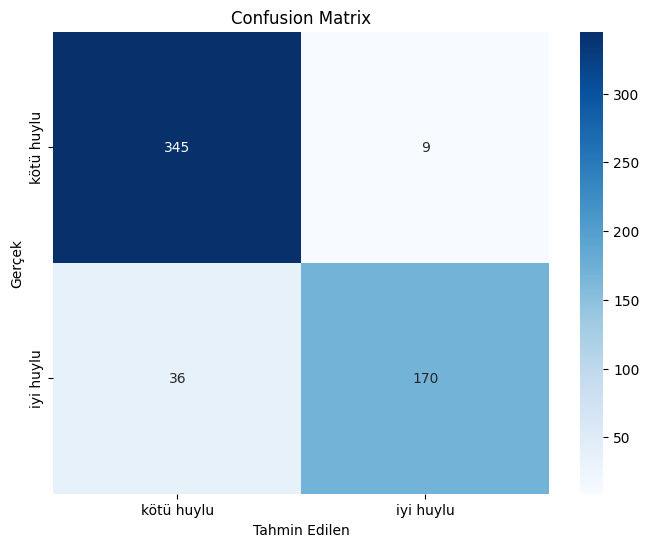

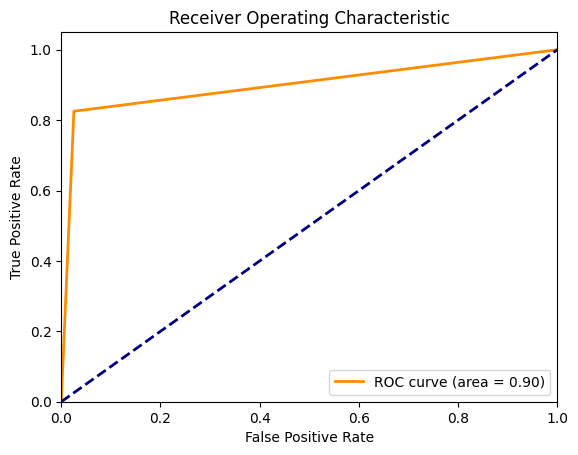

In [ ]:
#feature selection ile naive bayes

train_data = df.drop(columns=["diagnosis"])
X = train_data
y = df["diagnosis"]

selector = VarianceThreshold(threshold=0.1)
X_var = selector.fit_transform(X)
selected_features_var = X.columns[selector.get_support()]
removed_features_var = X.columns[~selector.get_support()]

model = RandomForestClassifier(n_estimators=100)
rfe = RFE(model, n_features_to_select=20)
X_rfe = rfe.fit_transform(X_var, y)
selected_features_rfe = selected_features_var[rfe.support_]
removed_features_rfe = selected_features_var[~rfe.support_]

X_selected = X[selected_features_rfe]

def k_fold_cross_validation(X, y, k=10):
    fold_size = len(X) // k
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    all_true_labels = []
    all_predictions = []

    def calculate_metrics(y_true, y_pred):
        truepositive = np.sum((y_true == 1) & (y_pred == 1))
        truenegative = np.sum((y_true == 0) & (y_pred == 0))
        falsepositive = np.sum((y_true == 0) & (y_pred == 1))
        falsenegative = np.sum((y_true == 1) & (y_pred == 0))

        accuracy = (truepositive + truenegative) / (truepositive + truenegative + falsepositive + falsenegative)

        if (truepositive + falsepositive) == 0:
            precision = 0
        else:
            precision = truepositive / (truepositive + falsepositive)

        if (truepositive + falsenegative) == 0:
            recall = 0
        else:
            recall = truepositive / (truepositive + falsenegative)

        if (precision + recall) == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)

        return accuracy, precision, recall, f1

    for i in range(k):
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(X))) - set(test_indices))
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        model = GaussianNB()
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        accuracy, precision, recall, f1 = calculate_metrics(y_test.values, predictions)

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

        all_true_labels.extend(y_test)
        all_predictions.extend(predictions)

    print("Ortalama Metrikler:")
    print(f"Average Accuracy: {np.mean(accuracy_scores)}")
    print(f"Average F1 Score: {np.mean(f1_scores)}")
    print(f"Average Precision: {np.mean(precision_scores)}")
    print(f"Average Recall: {np.mean(recall_scores)}")

    # Confusion matrix oluşturma
    cm = confusion_matrix(all_true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['kötü huylu', 'iyi huylu'], yticklabels=['kötü huylu', 'iyi huylu'])
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC eğrisi oluşturma
    fpr, tpr, thresholds = roc_curve(all_true_labels, all_predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Seçilen ve çıkarılan özellikleri yazdırma
print("Seçilen Özellikler (Variance Threshold Sonrası):")
print(selected_features_var)
print("\nÇıkarılan Özellikler (Variance Threshold Sonrası):")
print(removed_features_var)

print("\nSeçilen Özellikler (RFE Sonrası):")
print(selected_features_rfe)
print("\nÇıkarılan Özellikler (RFE Sonrası):")
print(removed_features_rfe)

k_fold_cross_validation(X_selected, y)

Seçilen Özellikler (Variance Threshold Sonrası):
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'texture_se', 'perimeter_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst'],
      dtype='object')

Çıkarılan Özellikler (Variance Threshold Sonrası):
Index(['smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Seçilen Özellikler (RFE Sonrası):
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'texture_se', 'perimeter_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst'],
      dtype='object

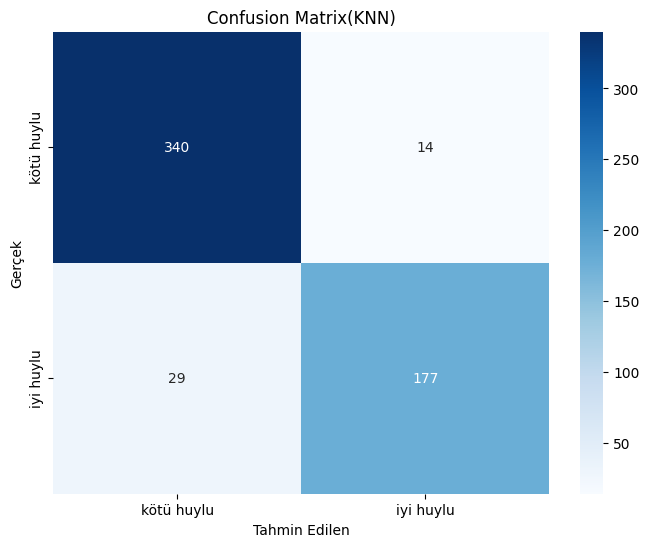

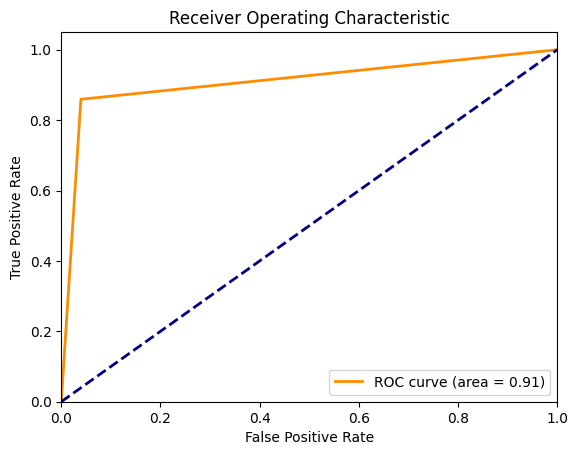

In [ ]:
#feature selection yapılan knn

train_data = df.drop(columns=["diagnosis"])
X = train_data
y = df["diagnosis"]

selector = VarianceThreshold(threshold=0.1)
X_var = selector.fit_transform(X)
selected_features_var = X.columns[selector.get_support()]
removed_features_var = X.columns[~selector.get_support()]

model = RandomForestClassifier(n_estimators=100)
rfe = RFE(model, n_features_to_select=20)
X_rfe = rfe.fit_transform(X_var, y)
selected_features_rfe = selected_features_var[rfe.support_]
removed_features_rfe = selected_features_var[~rfe.support_]

X_selected = X[selected_features_rfe]

def k_fold_cross_validation(X, y, k=10):
    fold_size = len(X) // k
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    all_true_labels = []
    all_predictions = []

    def calculate_metrics(y_true, y_pred):
        truepositive = np.sum((y_true == 1) & (y_pred == 1))
        truenegative = np.sum((y_true == 0) & (y_pred == 0))
        falsepositive = np.sum((y_true == 0) & (y_pred == 1))
        falsenegative = np.sum((y_true == 1) & (y_pred == 0))

        accuracy = (truepositive + truenegative) / (truepositive + truenegative + falsepositive + falsenegative)

        if (truepositive + falsepositive) == 0:
            precision = 0
        else:
            precision = truepositive / (truepositive + falsepositive)

        if (truepositive + falsenegative) == 0:
            recall = 0
        else:
            recall = truepositive / (truepositive + falsenegative)

        if (precision + recall) == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)

        return accuracy, precision, recall, f1

    for i in range(k):
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(X))) - set(test_indices))
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        model = KNeighborsClassifier()
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        accuracy, precision, recall, f1 = calculate_metrics(y_test.values, predictions)

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

        all_true_labels.extend(y_test)
        all_predictions.extend(predictions)

    print("Ortalama Metrikler:")
    print(f"Average Accuracy: {np.mean(accuracy_scores)}")
    print(f"Average F1 Score: {np.mean(f1_scores)}")
    print(f"Average Precision: {np.mean(precision_scores)}")
    print(f"Average Recall: {np.mean(recall_scores)}")

    # Confusion matrix oluşturma
    cm = confusion_matrix(all_true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['kötü huylu', 'iyi huylu'], yticklabels=['kötü huylu', 'iyi huylu'])
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix(KNN)')
    plt.show()

    # ROC eğrisi oluşturma
    fpr, tpr, thresholds = roc_curve(all_true_labels, all_predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Seçilen ve çıkarılan özellikleri yazdırma
print("Seçilen Özellikler (Variance Threshold Sonrası):")
print(selected_features_var)
print("\nÇıkarılan Özellikler (Variance Threshold Sonrası):")
print(removed_features_var)

print("\nSeçilen Özellikler (RFE Sonrası):")
print(selected_features_rfe)
print("\nÇıkarılan Özellikler (RFE Sonrası):")
print(removed_features_rfe)

k_fold_cross_validation(X_selected, y)

Ortalama Metrikler:
Average Accuracy: 0.9232142857142858
Average F1 Score: 0.8875216658859693
Average Precision: 0.9094973544973545
Average Recall: 0.8726463242737607


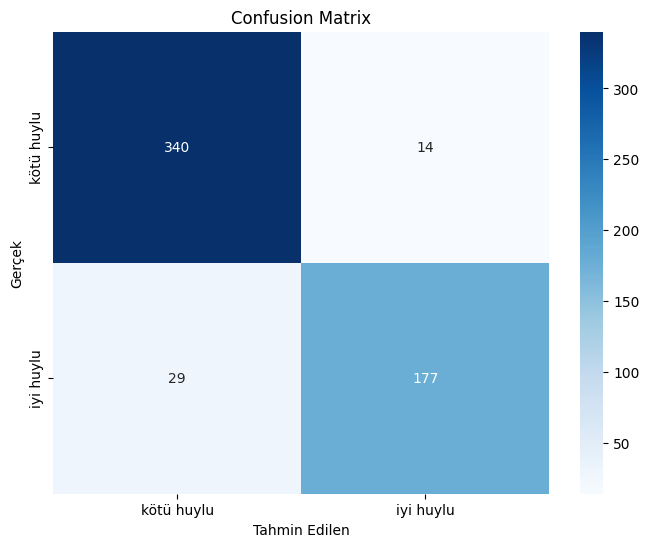

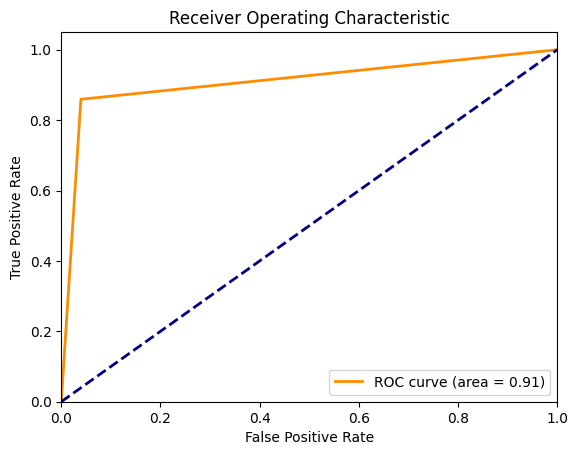

In [ ]:
#feature selection olmadan knn

train_data = df.drop(columns=["diagnosis"])
X = train_data
y = df["diagnosis"]

def k_fold_cross_validation(X, y, k=10):
    fold_size = len(X) // k
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    all_true_labels = []
    all_predictions = []

    def calculate_metrics(y_true, y_pred):
        truepositive = np.sum((y_true == 1) & (y_pred == 1))
        truenegative = np.sum((y_true == 0) & (y_pred == 0))
        falsepositive = np.sum((y_true == 0) & (y_pred == 1))
        falsenegative = np.sum((y_true == 1) & (y_pred == 0))

        accuracy = (truepositive + truenegative) / (truepositive + truenegative + falsepositive + falsenegative)

        if (truepositive + falsepositive) == 0:
            precision = 0
        else:
            precision = truepositive / (truepositive + falsepositive)

        if (truepositive + falsenegative) == 0:
            recall = 0
        else:
            recall = truepositive / (truepositive + falsenegative)

        if (precision + recall) == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)

        return accuracy, precision, recall, f1

    for i in range(k):
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(X))) - set(test_indices))
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        model = KNeighborsClassifier()
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        accuracy, precision, recall, f1 = calculate_metrics(y_test.values, predictions)

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

        all_true_labels.extend(y_test)
        all_predictions.extend(predictions)

    print("Ortalama Metrikler:")
    print(f"Average Accuracy: {np.mean(accuracy_scores)}")
    print(f"Average F1 Score: {np.mean(f1_scores)}")
    print(f"Average Precision: {np.mean(precision_scores)}")
    print(f"Average Recall: {np.mean(recall_scores)}")

    # Confusion matrix oluşturma
    cm = confusion_matrix(all_true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['kötü huylu', 'iyi huylu'], yticklabels=['kötü huylu', 'iyi huylu'])
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix(KNN)')
    plt.show()

    # ROC eğrisi oluşturma
    fpr, tpr, thresholds = roc_curve(all_true_labels, all_predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

k_fold_cross_validation(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Ortalama Metrikler:
Ortalama Accuracy: 0.9232142857142858
Ortalama F1 Score: 0.9054208764927321
Ortalama Precision: 0.9018725645309653
Ortalama Recall: 0.9202436732103578


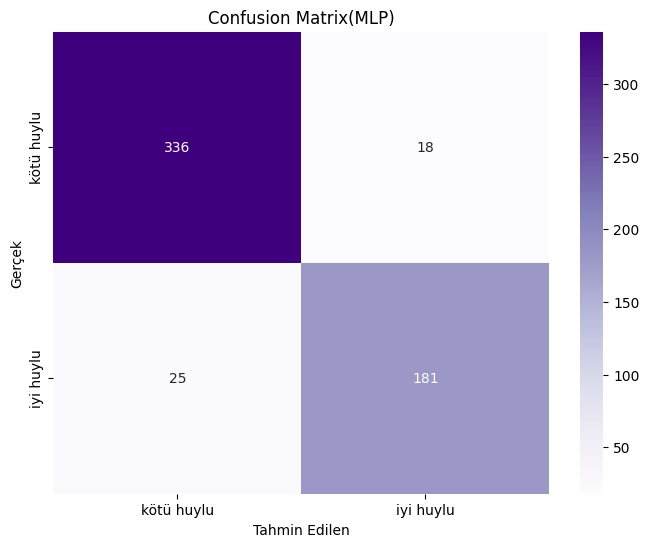

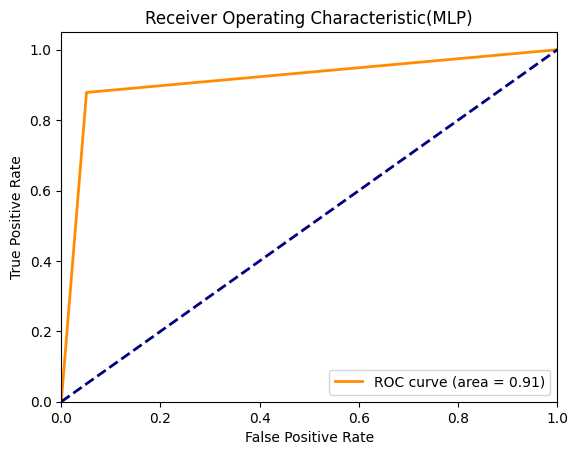

In [ ]:
train = df.drop(columns=["diagnosis"])
X = train
y = df["diagnosis"]

def k_fold_cross_validation(X, y, k=10):
    fold_size = len(X) // k
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    all_true_labels = []
    all_predictions = []

    for i in range(k):
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(X))) - set(test_indices))
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        mlp_model = MLPClassifier()
        mlp_model.fit(X_train, y_train)
        predictions = mlp_model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions, average='macro')
        precision = precision_score(y_test, predictions, average='macro')
        recall = recall_score(y_test, predictions, average='macro')

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

        all_true_labels.extend(y_test)
        all_predictions.extend(predictions)

    print("Ortalama Metrikler:")
    print(f"Ortalama Accuracy: {np.mean(accuracy_scores)}")
    print(f"Ortalama F1 Score: {np.mean(f1_scores)}")
    print(f"Ortalama Precision: {np.mean(precision_scores)}")
    print(f"Ortalama Recall: {np.mean(recall_scores)}")

    # Confusion matrix oluşturma
    cm = confusion_matrix(all_true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=['kötü huylu', 'iyi huylu'], yticklabels=['kötü huylu', 'iyi huylu'])
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix(MLP)')
    plt.show()

    # ROC eğrisi oluşturma
    fpr, tpr, thresholds = roc_curve(all_true_labels, all_predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic(MLP)')
    plt.legend(loc="lower right")
    plt.show()

k_fold_cross_validation(X, y)

Ortalama Metrikler:
Ortalama Accuracy: 0.9553571428571427
Ortalama F1 Score: 0.9443575511807809
Ortalama Precision: 0.9403095680567521
Ortalama Recall: 0.9528617509626687


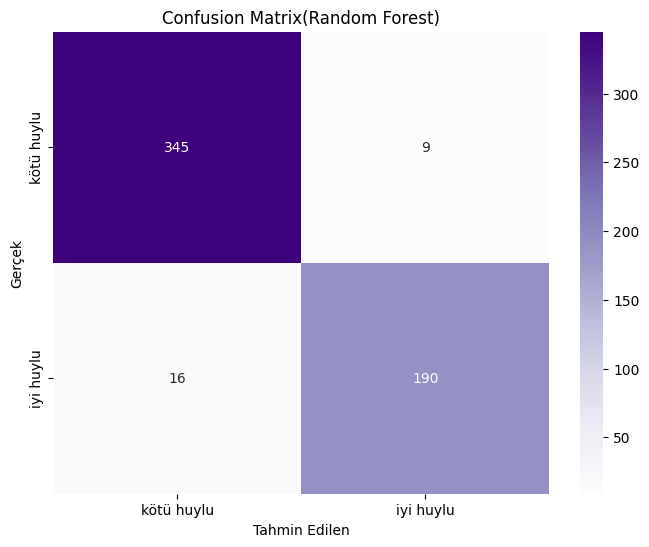

ValueError: Found input variables with inconsistent numbers of samples: [560, 569]

In [ ]:
datasetx = df.drop(columns=["diagnosis"])
X = datasetx
y = df["diagnosis"]

def k_fold_cross_validation(X, y, k=10):
    fold_size = len(X) // k
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    all_true_labels = []
    all_predictions = []

    for i in range(k):
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(X))) - set(test_indices))
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        rf_model = RandomForestClassifier()
        rf_model.fit(X_train, y_train)
        predictions = rf_model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions, average='macro')
        precision = precision_score(y_test, predictions, average='macro')
        recall = recall_score(y_test, predictions, average='macro')

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

        all_true_labels.extend(y_test)
        all_predictions.extend(predictions)

    print("Ortalama Metrikler:")
    print(f"Ortalama Accuracy: {np.mean(accuracy_scores)}")
    print(f"Ortalama F1 Score: {np.mean(f1_scores)}")
    print(f"Ortalama Precision: {np.mean(precision_scores)}")
    print(f"Ortalama Recall: {np.mean(recall_scores)}")

    # Confusion matrix oluşturma
    cm = confusion_matrix(all_true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=['kötü huylu', 'iyi huylu'], yticklabels=['kötü huylu', 'iyi huylu'])
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix(Random Forest)')
    plt.show()

    # ROC curve oluşturma
    y_scores = rf_model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(all_true_labels, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic(Random Forest)')
    plt.legend(loc="lower right")
    plt.show()

k_fold_cross_validation(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Ortalama Metrikler:
Average Accuracy: 0.8857142857142856
Average F1 Score: 0.8631026380612358
Average Precision: 0.8964701425687304
Average Recall: 0.8731278441219301


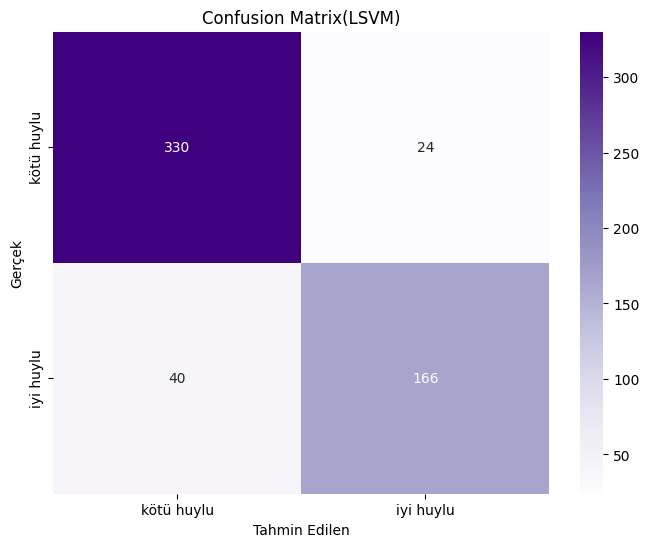

ValueError: Found input variables with inconsistent numbers of samples: [560, 56]

In [ ]:
from sklearn.svm import LinearSVC

datasetx = df.drop(columns=["diagnosis"])
X = datasetx
y = df["diagnosis"]

def k_fold_cross_validation(X, y, k=10):
    fold_size = len(X) // k
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    all_true_labels = []
    all_predictions = []

    for i in range(k):
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(X))) - set(test_indices))
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        svm_model = LinearSVC()
        svm_model.fit(X_train, y_train)
        predictions = svm_model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions, average='macro')
        precision = precision_score(y_test, predictions, average='macro')
        recall = recall_score(y_test, predictions, average='macro')

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

        all_true_labels.extend(y_test)
        all_predictions.extend(predictions)

    print("Ortalama Metrikler:")
    print(f"Average Accuracy: {np.mean(accuracy_scores)}")
    print(f"Average F1 Score: {np.mean(f1_scores)}")
    print(f"Average Precision: {np.mean(precision_scores)}")
    print(f"Average Recall: {np.mean(recall_scores)}")

    # Confusion matrix oluşturma
    cm = confusion_matrix(all_true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=['kötü huylu', 'iyi huylu'], yticklabels=['kötü huylu', 'iyi huylu'])
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix(LSVM)')
    plt.show()

    # LinearSVC'nin predict_proba yöntemi yok, bu yüzden karar fonksiyonunu kullanacağız
    fpr, tpr, thresholds = roc_curve(all_true_labels, y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

k_fold_cross_validation(X, y)


Ortalama Metrikler:
Ortalama Accuracy: 0.9142857142857143
Ortalama F1 Score: 0.8979804764833716
Ortalama Precision: 0.9116107037384316
Ortalama Recall: 0.9070710121537514


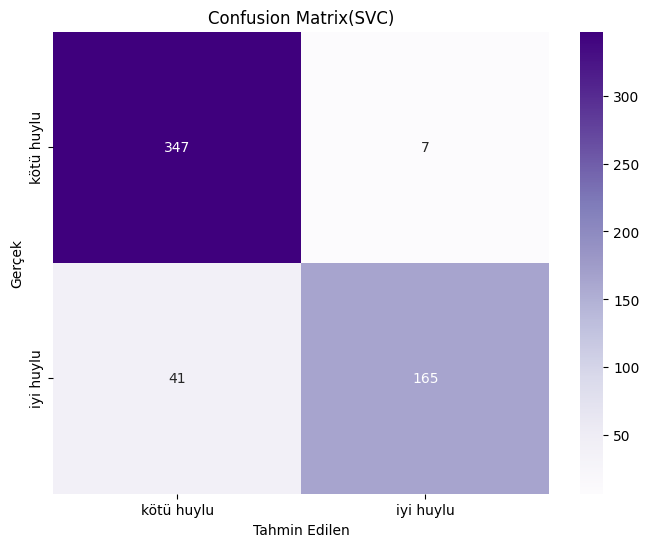

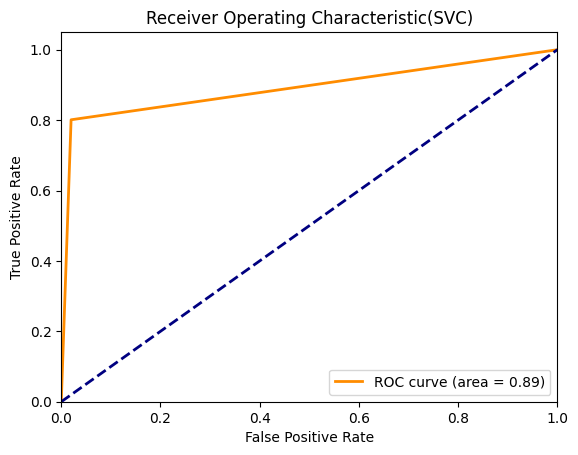

In [ ]:
train = df.drop(columns=["diagnosis"])
X = train
y = df["diagnosis"]

def k_fold_cross_validation(X, y, k=10):
    fold_size = len(X) // k
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    all_true_labels = []
    all_predictions = []

    for i in range(k):
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(X))) - set(test_indices))
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        svm_model = SVC()
        svm_model.fit(X_train, y_train)
        predictions = svm_model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions, average='macro')
        precision = precision_score(y_test, predictions, average='macro')
        recall = recall_score(y_test, predictions, average='macro')

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

        all_true_labels.extend(y_test)
        all_predictions.extend(predictions)

    print("Ortalama Metrikler:")
    print(f"Ortalama Accuracy: {np.mean(accuracy_scores)}")
    print(f"Ortalama F1 Score: {np.mean(f1_scores)}")
    print(f"Ortalama Precision: {np.mean(precision_scores)}")
    print(f"Ortalama Recall: {np.mean(recall_scores)}")

    # Confusion matrix oluşturma
    cm = confusion_matrix(all_true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=['kötü huylu', 'iyi huylu'], yticklabels=['kötü huylu', 'iyi huylu'])
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix(SVC)')
    plt.show()

    # ROC eğrisi oluşturma
    fpr, tpr, thresholds = roc_curve(all_true_labels, all_predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic(SVC)')
    plt.legend(loc="lower right")
    plt.show()

k_fold_cross_validation(X, y)